* This notebook implements the SSL model in [Kingma (2014)](https://arxiv.org/abs/1406.5298).
* C.f. [this implementation](https://github.com/wiseodd/generative-models/blob/master/VAE/conditional_vae/cvae_tensorflow.py).

> What I cannot create I cannot understand.

## Conditional Variational Auto-encoder

### Motivation

* Conditional variational auto-encoder extends variational auto-encoder.

### Definitions

* Let $X$ be the observed random variable and $Y, Z$ the latent. Let

  \begin{equation}
    Y, Z \sim P_{Y, Z}
  \end{equation}

  be some given prior.
  
* And let

  \begin{equation}
    X \mid Y, Z \sim P_{X \mid Y, Z; \phi}
  \end{equation}

  for some distribution in a family parameterized by $\phi$.

For instance, if $X \in \mathbb{R}$, it is general to assume a multivariate Gaussian distribution, diagonalized or semi-diagonalized, then we have

\begin{equation}
  X \mid Y, Z \sim \mathcal{N} \left( \mu(Y, Z; \phi_1), \sigma(Y, Z; \phi_2) \right),
\end{equation}

for some universality functions $\mu(\cdot; \phi_2)$ and $\sigma(\cdot; \phi_2)$ and $\phi := (\phi_1, \phi_2)$.

### Variational Inference

Utilization of the dataset of $(x, y)$ forces us to employ some distribution $q(z \mid x, y)$ (to be determined) to fit $p(z \mid x, y)$ (and if the dataset is of $(y, z)$, then we are forced to $p(x \mid y, z)$ instead), then we have the bound by KL-divergence

\begin{align}
  \text{KL} \left( q(z \mid x,y) \| p(z \mid x,y) \right)
  & = \mathbb{E}_{z \sim q(z \mid x,y)} \left[
         \ln q(z \mid x,y) - \ln p(x \mid y,z) - \ln p(z \mid y) \right] \\
  & + \ln p(x \mid y) \\
  & \geq 0.
\end{align}

Thus, a loss

\begin{align}
  L(x, y)
  & := \mathbb{E}_{z \sim q(z \mid x,y)} \left[
         \ln q(z \mid x,y) - \ln p(x \mid y,z) - \ln p(z \mid y) \right] \\
  & \geq - \ln p(x \mid y).
\end{align}

The equality can be reached if and only if $q(z \mid x, y) = p(z \mid x, y)$.

### Relation with Auto-encoder

* The $\mathbb{E}_{z \sim q(z \mid x, y)} \left[ - \ln p(x \mid y, z) \right]$ part can be interpreted as a reconstruction loss.

* The $\mathbb{E}_{z \sim q(z \mid x, y)} \left[ - \ln p(z \mid y) \right]$ part serves as regularization terms.

* It seems that the $\mathbb{E}_{z \sim q(z \mid x, y)} \left[ \ln q(z \mid x, y) \right]$ part has no correspondence in auto-encoder.

### Example

In this very example on the MNIST dataset:

\begin{align}
  Y & \sim \text{Categorical uniform}; \\
  Z & \sim \mathcal{N} (0, 1); \\
  X \mid Y, Z & \sim \text{Bernoulli}\left( p(y, z; \theta) \right).
\end{align}

And inference distributions:

\begin{align}
  Z_0 \mid X, Y & \sim \mathcal{N}\left( \mu(x, y; \phi_1), \sigma(x, y; \phi_2) \right); \\
  Z \mid Z_0 & \sim T(z_0).
\end{align}

where $Z_0$ obeys the "base inference distribution", as a Gaussian; and $T$ is bijective with universality.

## Semi-supervised Learning

### Motivation

* Semi-supervised learning utilizes the conditional variational auto-encoder.

### Definitions

* Let

  \begin{equation}
    Y \mid Z \sim P_{Y \mid Z; \theta}.
  \end{equation}
  
  for some distribution in a family parameterized by $\theta$.

### Variational Inference (Something Wrong!)

By the conditional probability formula,

\begin{equation}
  p(y, z \mid x) = p(z \mid x, y) p(y \mid x).
\end{equation}

With this formula, we have the bound by KL-divergence,

\begin{align}
  \text{KL} \left( q(y, z \mid x) \| p(y, z \mid x) \right)
  & = \int q(y, z \mid x) \left[
        \ln q(y, z \mid x) - \ln p(y, z \mid x)
        \right] dy dz \\
  & = \int q(z \mid x, y) q(y \mid x) \left[
        \ln q(z \mid x, y) + \ln q(y \mid x) - \ln p(x \mid y, z) - \ln p(y, z)
        \right] dy dz \\
  & + \ln p(x).
\end{align}

Integrating out $z$ gives

\begin{align}
  \text{KL} \left( q(y, z \mid x) \| p(y, z \mid x) \right)
  & = \int q(y \mid x) \left[ L(x, y) + \ln q(y \mid x) \right] dy  + \ln p(x) \\
  & = \mathbb{E}_{y \sim q(y \mid x)} \left[ L(x, y) \right]
    - \mathcal{H} \left[ q(y \mid x) \right]
    + \ln p(x) \\
  & \geq 0.
\end{align}

Thus a loss

\begin{align}
  U(x) & := \mathbb{E}_{y \sim q(y \mid x)} \left[ L(x, y) \right]
          - \mathcal{H} \left[ q(y \mid x) \right] \\
       & \geq - \ln p(x).
\end{align}

The equality can be reached if and only if $q(y \mid x) = p(y \mid x)$, then $q(y, z \mid x) = p(y, z \mid x)$.

This loss can be derived in a more concise way. By approximation $-\ln p(x, y) \approx L(x, y)$,

\begin{align}
  \text{KL} \left( q(y \mid x) \| p(y \mid x) \right)
  & = \int q(y \mid x) \left[ \ln q(y \mid x) - \ln p(y \mid x) \right] dy \\
  & = \int q(y \mid x) \left[ \ln q(y \mid x) - \ln p(x, y) \right] dy + \ln p(x) \\
  & \approx \int q(y \mid x) \left[ \ln q(y \mid x) + \ln L(x, y) \right] dy
    + \ln p(x) \\
  & = \mathbb{E}_{y \sim q(y \mid x)} \left[ L(x, y) \right]
    - \mathcal{H} \left[ q(y \mid x) \right].
\end{align}

Thus, again,

\begin{align}
  U(x) & := \mathbb{E}_{y \sim q(y \mid x)} \left[ L(x, y) \right]
          - \mathcal{H} \left[ q(y \mid x) \right] \\
       & \geq - \ln p(x).
\end{align}

The equality can be reached if and only if $q(y \mid x) = p(y \mid x)$.

The trick in the training is that, the minimization of $L(x, y)$ has **completed** the training of the variables in $p(x \mid y, z)$ and $q(z \mid x, y)$, which, thus, shall
**not** be trained further in the minimization of $U(x)$.

(The strange thing is that, after training the variables in $p(x \mid y, z)$ and $q(z \mid x, y)$ by minimizing $L(x, y)$, if train them further in the minimizing of $U(x)$, then the trained variables will give a **higher** $L(x, y)$ than that after the minimization of its own. Why?)

### Example

In this very example:

\begin{equation}
  Y \mid Z \sim \text{Categorical} \left( \pi(Z; \theta) \right).
\end{equation}

## Implementation

In this implementation, we follow the spirit of TensorFlow, hiding the parameters of functions. That is, define `L(X, y; phi)` as `L(phi)(X, y)`.

In [27]:
%matplotlib inline

import os
from IPython.display import display
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
import numpy as np
import tensorflow as tf
import tensorflow.contrib.distributions as tfd
from tensorflow.contrib.distributions.python.ops import bijectors as tfb
from tensorflow.examples.tutorials.mnist import input_data

# For reproducibility
seed = 42
np.random.seed(seed)
tf.set_random_seed(seed)

### Functions

In [2]:
def get_q_z_Xy(X, y, z_dim, hidden_layers=None, bijectors=None,
               dtype='float32', name='q_z_Xy', reuse=None):
  """Returns the distribution of Z | X, Y.
  
  Z = bijector(Z_0), and
  Z_0 | X, Y ~ Normal(mu(X,Y;phi), sigma(X,Y;phi)).
  
  Args:
    X: Tensor with shape `[batch_size, X_dim]`.
    y: Tensor with shape `[batch_size, y_dim]`.
    hidden_layers: List of positive integers. Defaults to
      `[512, 256, 128]`.
    bijectors: List of `tfb.Bijector`s. Defaults to an empty
      list.
    dtype: String.
    name: String.
    reuse: Boolean.
    
  Returns:
    An instance of `tfd.Distribution` with batch-shape `batch_size`
    and event-shape `z_dim`.
  """
  if bijectors is None:
    bijectors = []
  if hidden_layers is None:
    hidden_layers = [512, 256, 128]
    
  with tf.variable_scope(name, reuse=reuse):
    # For concatenating, the dtype shall be the same
    X = tf.cast(X, dtype)
    y = tf.cast(y, dtype)
    input_ = tf.concat([X, y], axis=1)
    
    hidden = input_
    for hidden_layer in hidden_layers:
      hidden = tf.layers.dense(hidden, hidden_layer,
                               activation=tf.nn.relu)
    # Outputs in the fiber-bundle space
    output = tf.layers.dense(hidden, z_dim * 2, activation=None)
    # shape: [batch_size, z_dim]
    mu, log_var = tf.split(output, [z_dim, z_dim], axis=1)
    
    q_z0_Xy = tfd.MultivariateNormalDiag(mu, tf.exp(log_var))
    chain = tfb.Chain(bijectors)
    q_z_Xy = tfd.TransformedDistribution(distribution=q_z0_Xy,
                                         bijector=chain)
    return q_z_Xy

In [3]:
def get_bijectors(bijector_layers=None, name='bjiectors', reuse=None):
  """Complexify the inference distribution by extra-bijectors like
  normalizing flows.
  
  Args:
    bijector_layers: List of lists of integers. Each sub-list represents
      the hidden_layers of the corresponding bijector. Defaults to ten
      `[128]` lists, i.e. ten bijectors with each having one hidden layer
      with 128 perceptrons.
    name: String.
    reuse: Boolean.
    
  Returns:
    List of `Bijector`s.
  """
  if bijector_layers is None:
    n_bijectors = 10
    bijector_layers = [[128] for _ in range(n_bijectors)]
    
  with tf.variable_scope(name, reuse=reuse):
    bijectors = []
    for bijector_layer in bijector_layers:
      shift_and_log_scale_fn = \
          tfb.masked_autoregressive_default_template(bijector_layer)
      # MAP is extremely slow in training. Use IAF instead.
      bijector = tfb.Invert(
          tfb.MaskedAutoregressiveFlow(shift_and_log_scale_fn))
      bijectors.append(bijector)
    return bijectors

In [4]:
def get_p_X_yz(y, z, X_dim, hidden_layers=None,
               dtype='float32', name='p_X_yz', reuse=None):
  """Returns the distribution of X | Y, Z.
  
  X | Y, Z ~ Bernoulli( p(Y, Z; theta) ).
    
  Args:
    y: Tensor with shape `[batch_size, y_dim]` and dtype `float32`.
    z: Tensor with shape `[batch_size, z_dim]` and dtype `float32`.
    X_dim: Positive integer.
    hidden_layers: List of positive integers. Defaults to
      `[128, 256, 512]`.
    dtype: String.
    name: String.
    reuse: Boolean.
    
  Returns:
    An instance of `tfd.Distribution` with batch-shape `batch_size`
    and event-shape `X_dim`.
  """
  if hidden_layers is None:
    hidden_layers = [128, 256, 512]
    
  with tf.variable_scope(name, reuse=reuse):
    # For concatenating, the dtype shall be the same
    y = tf.cast(y, dtype)
    z = tf.cast(z, dtype)
    input_ = tf.concat([y, z], axis=1)

    hidden = input_
    for hidden_layer in hidden_layers:
      hidden = tf.layers.dense(hidden, hidden_layer,
                               activation=tf.nn.relu)
    logits = tf.layers.dense(hidden, X_dim, activation=None)  
    
    p_X_yz = tfd.Independent(tfd.Bernoulli(logits=logits))
    return p_X_yz

In [5]:
def get_loss_Xy(get_q_z_Xy, get_p_X_yz, p_z_y, reuse=None):
  """L(X,y) := E_{z ~ q(z|X,y)} [ log_q(z|X,y) - log_p(X|y,z) - log_p(z|y) ].
  
  Args:
    get_q_z_Xy: Callable with the signature:
      Args:
        X: Tensor with shape `[batch_size, X_dim]`.
        y: Tensor with shape `[batch_size, y_dim]`.
        reuse: Boolean.
      Returns:
        An instance of `tfd.Distribution` with batch-shape `batch_size`
        and event-shape `z_dim`.
    get_p_X_yz: Callable with the signature:
      Args:
        y: Tensor with shape `[batch_size, y_dim]` and dtype `float32`.
        z: Tensor with shape `[batch_size, z_dim]` and dtype `float32`.
        reuse: Boolean.
      Returns:
        An instance of `tfd.Distribution` with batch-shape `batch_size`
        and event-shape `X_dim`.
    p_z_y: An instance of `tfd.Distribution` with batch-shape `batch_size`
      and event-shape `z_dim`.
    reuse: If reuse the variables in `get_q_z_Xy` and `get_p_X_yz`.
    
  Returns:
    Callable with the signature:
      Args:
        X: Tensor of the shape `[batch_size, X_dim]`.
        y: Tensor of the shape `[batch_size, y_dim]`.
        name: String.
      Returns:
        Tensor of the shape `[batch_size]`.
  """
  
  def loss_Xy(X, y, name='loss_Xy'):
    """
    Args:
      X: Tensor of the shape `[batch_size, X_dim]`.
      y: Tensor of the shape `[batch_size, y_dim]`.
      name: String.

    Returns:
      Tensor of the shape `[batch_size]`.
    """
    with tf.name_scope(name):
      # Get the distribution q(z|X,y)
      q_z_Xy = get_q_z_Xy(X, y, reuse=reuse)
      
      # Get the distribution p(X|y,z)
      z_samples = q_z_Xy.sample()
      p_X_yz = get_p_X_yz(y, z_samples, reuse=reuse)
      
      # Compute the tensor of L(X,y)
      loss_Xy_tensor = tf.zeros([batch_size])  # initialize.
      # E_{z ~ q(z|X,y)} [ log_q(z|X,y) ]
      loss_Xy_tensor += q_z_Xy.log_prob(z_samples)
      # E_{z ~ q(z|X,y)} [ - log_p(z|y) ]
      loss_Xy_tensor += -1 * p_z_y.log_prob(z_samples)
      # E_{z ~ q(z|X,y)} [ - log_p(X|y,z) ]
      loss_Xy_tensor += -1 * p_X_yz.log_prob(X)
      return loss_Xy_tensor
    
  return loss_Xy

In [6]:
def get_q_y_X(X, name='q_y_X', reuse=None):
  """Returns the distribution of Y | X.
  
  Y | X ~ Categorical( pi(X; alpha) ).
  
  Args:
    X: Tensor of the shape `[batch_size, X_dim]`.
    
  Returns:
    An instance of `tfd.Distribution` with batch-shape `batch_size`.
    and event-shape `()`.
  """
  with tf.variable_scope(name, reuse=reuse):
    hidden = tf.layers.dense(X, 512, activation=tf.nn.relu)
    hidden = tf.layers.dense(hidden, 256, activation=tf.nn.relu)
    hidden = tf.layers.dense(hidden, 128, activation=tf.nn.relu)
    # Outputs in the fiber-bundle space
    logits = tf.layers.dense(hidden, y_dim, activation=None)
    q_y_X = tfd.Independent(tfd.OneHotCategorical(logits=logits))
    return q_y_X

In [7]:
def get_loss_X(q_y_X, loss_Xy, name='loss_X'):
  """U(X) := E_{y ~ q(y|X)} [ L(X,y) ] - H(q(y|X)).
  
  Args:
    q_y_X: An instance of `tfd.Distribution` with batch-shape `batch_size`
      and event-shape `()`.
    loss_Xy: Callable with the signature:
      Args:
        X: Tensor of the shape `[batch_size, X_dim]`.
        y: Tensor of the shape `[batch_size, y_dim]`.
      Returns:
        Tensor of the shape `[batch_size]`.
    
  Returns:
    Callable with signature:
      Args:
        X: Tensor of the shape `[batch_size, X_dim]`.
      Returns:
        Tensor of the shape `[batch_size]`.
  """
  def loss_X(X):
    """
    Args:
      X: Tensor of the shape `[batch_size, X_dim]`.
      
    Returns:
      Tensor of the shape `[batch_size]`.
    """
    with tf.name_scope(name):
      # shape: `[batch_size, y_dim]`
      y_samples = q_y_X.sample()
      # shape: `[batch_size]`
      loss_X_tensor = loss_Xy(X, y_samples) - q_y_X.entropy()
      return loss_X_tensor
  return loss_X

In [8]:
import collections

def get_dependent_variables(tensor_or_tensors):
  """Returns all variables that the tensor `tensor` depends on.
  
  Forked from: https://stackoverflow.com/a/42861919/1218716
  
  Args:
    tensor_or_tensors: Tensor or a collection of tensors.
    
  Returns:
    List of variables.
  """
  if isinstance(tensor_or_tensors, (list, tuple, set)):  # a collection.
    tensors = tensor_or_tensors
    dependent_vars = []
    for tensor in tensors:
      dependent_vars += get_dependent_variables(tensor)
    return list(set(dependent_vars))
  # When not a collection,
  tensor = tensor_or_tensors
  
  # Initialize
  starting_op = tensor.op
  dependent_vars = []
  queue = collections.deque()
  queue.append(starting_op)
  op_to_var = {var.op: var for var in tf.trainable_variables()}
  visited = set([starting_op])

  while queue:
    op = queue.popleft()
    try:
      dependent_vars.append(op_to_var[op])
    except KeyError:
      # `op` is not a variable, so search its inputs (if any). 
      for op_input in op.inputs:
        if op_input.op not in visited:
          queue.append(op_input.op)
          visited.add(op_input.op)
          
  return dependent_vars

### Loss

In [9]:
batch_size = 128
X_dim = 28 * 28
y_dim = 10

X = tf.placeholder(shape=[batch_size, X_dim], dtype='float32', name='X')
y = tf.placeholder(shape=[batch_size, y_dim], dtype='float32', name='y')

In [28]:
z_dim = 64

def _get_q_z_Xy(X, y, reuse):
  bijectors = get_bijectors(reuse=reuse)
  #bijectors = []  # for comparison
  return get_q_z_Xy(X, y, z_dim, bijectors=bijectors, reuse=reuse)

def _get_p_X_yz(y, z, reuse):
  return get_p_X_yz(y, z, X_dim=X_dim, reuse=reuse)

p_z_y = tfd.MultivariateNormalDiag(tf.zeros([batch_size, z_dim]),
                                   name='p_z_y')

loss_Xy = get_loss_Xy(_get_q_z_Xy, _get_p_X_yz, p_z_y,
                      reuse=tf.AUTO_REUSE)
loss_Xy_tensor = loss_Xy(X, y)
loss_Xy_scalar = tf.reduce_mean(loss_Xy_tensor)

In [29]:
q_y_X = get_q_y_X(X, reuse=tf.AUTO_REUSE)
y_samples = q_y_X.sample()

In [12]:
loss_X = get_loss_X(q_y_X, loss_Xy)
loss_X_tensor = loss_X(X)
loss_X_scalar = tf.reduce_mean(loss_X_tensor)

### Training

In [13]:
# Minimize L(X,y)
optimizer = tf.train.AdamOptimizer(epsilon=1e-3)
minimize_loss_Xy = optimizer.minimize(loss_Xy_scalar)

In [14]:
# Minimize U(X), while fixing the variables in L(X,y)
optimizer = tf.train.AdamOptimizer(epsilon=1e-3, learning_rate=1e-5)
loss_X_vars = [_ for _ in get_dependent_variables(loss_X_scalar)
               if _ not in get_dependent_variables(loss_Xy_scalar)]
minimize_loss_X = optimizer.minimize(loss_X_scalar, var_list=loss_X_vars)

### Generating

In [15]:
# X | Y,Z
z_samples_ph = tf.placeholder(shape=[batch_size, z_dim], dtype='float32')
p_X_yz_gen = _get_p_X_yz(y, z_samples_ph, reuse=tf.AUTO_REUSE)
X_samples = p_X_yz_gen.sample()

In [16]:
def get_image(array):
  """
  Args:
    array: Numpy array with shape `[28*28]`.
    
  Returns:
    An image.
  """
  array = 255 * array
  array = array.reshape([28, 28])
  array = array.astype(np.uint8)
  return Image.fromarray(array)

### Having Fun

In [17]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [30]:
DATA_DIR = './dat'

mnist = input_data.read_data_sets(
    os.path.join(DATA_DIR, 'MNIST'),
    one_hot=True,
    source_url='http://yann.lecun.com/exdb/mnist/')


def get_X_y_batch(source='train'):
  if source == 'train':
    data = mnist.train
  elif source == 'test':
    data = mnist.test
  else:
    raise ValueError('Argument source can either be "train" or "test".')
  X_batch, y_batch = data.next_batch(batch_size)
  # Since X | Y, Z ~ Bernoulli, the observed value of X shall
  # either be 0 or 1,
  X_batch = np.where(X_batch >= 0.5, np.ones_like(X_batch),
                     np.zeros_like(X_batch))
  return X_batch, y_batch

Extracting ./dat/MNIST/train-images-idx3-ubyte.gz
Extracting ./dat/MNIST/train-labels-idx1-ubyte.gz
Extracting ./dat/MNIST/t10k-images-idx3-ubyte.gz
Extracting ./dat/MNIST/t10k-labels-idx1-ubyte.gz


#### Minimizing $L(x, y)$ over batches

100%|██████████| 100000/100000 [14:37<00:00, 113.96it/s]


Mean L(X,y): 71.26713
Final L(X,y): 65.16527


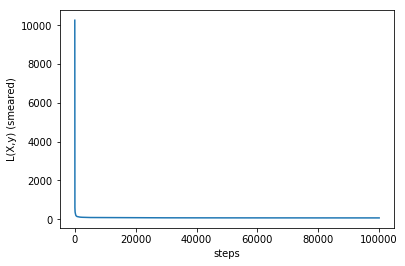

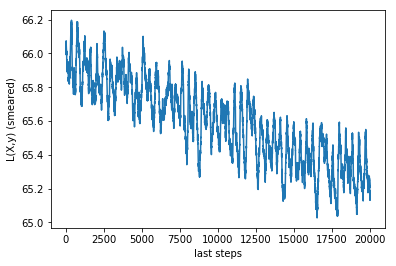

In [19]:
# Training by minimizing `loss_Xy_scalar`
loss_Xy_vals = []
smeared_loss_Xy_vals = []
smear_steps = 300
for i in tqdm(range(100000)):
  X_batch, y_batch = get_X_y_batch()
  _, loss_Xy_val = sess.run([minimize_loss_Xy, loss_Xy_scalar],
                            feed_dict={X: X_batch, y: y_batch})
  if np.isnan(loss_Xy_val):
    raise ValueError('Loss has been NaN.')
  loss_Xy_vals.append(loss_Xy_val)
  smeared_loss_Xy_vals.append(np.mean(loss_Xy_vals[-smear_steps:]))
print('Mean L(X,y):', np.mean(loss_Xy_vals))
print('Final L(X,y):', smeared_loss_Xy_vals[-1])

# Visualize the training loss
plt.plot(smeared_loss_Xy_vals)
plt.xlabel('steps')
plt.ylabel('L(X,y) (smeared)')
plt.show()

# Visualize the training loss in the last several steps
last_steps = 20000
plt.plot(smeared_loss_Xy_vals[-last_steps:])
plt.xlabel('last steps')
plt.ylabel('L(X,y) (smeared)')
plt.show()

In [20]:
_, y_batch = get_X_y_batch()

# Generate X
z_samples_val = np.random.normal(size=[batch_size, z_dim])
X_sample_vals = sess.run(X_samples,
    feed_dict={y: y_batch, z_samples_ph: z_samples_val})

# Display the results
n_display = 5
for i in range(n_display):
  print('Label:', np.argmax(y_batch[i]))
  print('Gnerated:')
  display(get_image(X_sample_vals[i]))
  print()

Label: 9
Gnerated:



Label: 5
Gnerated:



Label: 4
Gnerated:



Label: 0
Gnerated:



Label: 7
Gnerated:


#### Minimizing $U(x)$ over batches

In [21]:
'''
# Training by minimizing `loss_X_scalar`
loss_X_vals = []
smeared_loss_X_vals = []
for i in tqdm(range(100000)):
  X_batch, y_batch = get_X_y_batch()
  _, loss_X_val = sess.run([minimize_loss_X, loss_X_scalar],
                            feed_dict={X: X_batch})
  if np.isnan(loss_X_val):
    raise ValueError('Loss has been NaN.')
  loss_X_vals.append(loss_X_val)
  smeared_loss_X_vals.append(np.mean(loss_X_vals[-smear_steps:]))
print('Mean U(X):', np.mean(loss_X_vals))
print('Final U(X):', smeared_loss_X_vals[-1])

# Visualize the training loss
plt.plot(smeared_loss_X_vals)
plt.xlabel('steps')
plt.ylabel('U(X) (smeared)')
plt.show()

# Visualize the training loss in the last several steps
plt.plot(smeared_loss_X_vals[-last_steps:])
plt.xlabel('last steps')
plt.ylabel('U(X) (smeared)')
plt.show()
'''

"\n# Training by minimizing `loss_X_scalar`\nloss_X_vals = []\nsmeared_loss_X_vals = []\nfor i in tqdm(range(100000)):\n  X_batch, y_batch = get_X_y_batch()\n  _, loss_X_val = sess.run([minimize_loss_X, loss_X_scalar],\n                            feed_dict={X: X_batch})\n  if np.isnan(loss_X_val):\n    raise ValueError('Loss has been NaN.')\n  loss_X_vals.append(loss_X_val)\n  smeared_loss_X_vals.append(np.mean(loss_X_vals[-smear_steps:]))\nprint('Mean U(X):', np.mean(loss_X_vals))\nprint('Final U(X):', smeared_loss_X_vals[-1])\n\n# Visualize the training loss\nplt.plot(smeared_loss_X_vals)\nplt.xlabel('steps')\nplt.ylabel('U(X) (smeared)')\nplt.show()\n\n# Visualize the training loss in the last several steps\nplt.plot(smeared_loss_X_vals[-last_steps:])\nplt.xlabel('last steps')\nplt.ylabel('U(X) (smeared)')\nplt.show()\n"

In [22]:
'''
X_batch, y_batch = get_X_y_batch()

# Predict y
y_sample_vals = sess.run(y_samples, feed_dict={X: X_batch})

# Display the results
n_display = 5
for i in range(n_display):
  print('Label:', np.argmax(y_batch[i]))
  print('Predicted:', np.argmax(y_sample_vals[i]))
  print('Original:')
  display(get_image(X_batch[i]))
'''

"\nX_batch, y_batch = get_X_y_batch()\n\n# Predict y\ny_sample_vals = sess.run(y_samples, feed_dict={X: X_batch})\n\n# Display the results\nn_display = 5\nfor i in range(n_display):\n  print('Label:', np.argmax(y_batch[i]))\n  print('Predicted:', np.argmax(y_sample_vals[i]))\n  print('Original:')\n  display(get_image(X_batch[i]))\n"

* We find that the minimization of $U(x)$ is always non-effective. Why?

### Effect of Normalizing-flow

* While not employing normalizing flow, 100000 iterations give the final L(X,y) about 70.0.
* With 10 normalizing flows, 100000 iterations give the L(X,y) loss 65.5 (improved 4.5).

In [23]:
np.exp(4)

54.598150033144236

### Discrimination (Something Wrong!)

The training by minimizing $L(x, y)$ over data-batches gains the approximation

\begin{equation}
  \ln p(x \mid y) = - L(x, y).
\end{equation}

Thus,

\begin{align}
  \ln p(y \mid x)
  & = \ln p(x \mid y) + \ln p(y) - \ln p(x) \\
  & = -L(x, y) + \ln p(y) - \ln p(x).
\end{align}

That is, given $x$, the most probable value of $y$ is the one that minimizes the $L(x, y) + \ln p(y)$.

In [24]:
'''  # TODO
def predict(get_loss_Xy_val, X_batch, y_dim=y_dim):
  """Returns the log-probability of discrimination for each element
  in the X's batch `X_batch`.
  
  Args:
    get_loss_Xy_val: Callable that maps two arraies of the shapes
      `[batch_size, X_dim]` and `[batch_size, y_dim]`, respectively,
      to an array of the shape `[batch_size]`.
    X: Array of the shape `[batch_size, X_dim]`.
    
  Returns:
    An array of the shape `[batch_size, y_dim]`.
  """
  batch_size, _ = X_batch.shape
  
  loss_Xy_vals = []
  for i in range(y_dim):
    y_batch = np.zeros([batch_size, y_dim])
    y_batch[:,i] = np.ones([batch_size])
    loss_Xy_vals.append(get_loss_Xy_val(X_batch, y_batch))
  # shape: `[batch_size, y_dim]`
  log_prob_Xy = -np.stack(loss_Xy_vals, axis=1)
  # shape: `[batch_size]`
  log_prob_X = logsumexp(log_prob_Xy, axis=1)
  # shape: `[batch_size, 1]`
  log_prob_X = np.expand_dims(log_prob_X, axis=1)
  # shape: `[batch_size, y_dim]`
  log_probs = log_prob_Xy - log_prob_X
  return log_probs
'''

'  # TODO\ndef predict(get_loss_Xy_val, X_batch, y_dim=y_dim):\n  """Returns the log-probability of discrimination for each element\n  in the X\'s batch `X_batch`.\n  \n  Args:\n    get_loss_Xy_val: Callable that maps two arraies of the shapes\n      `[batch_size, X_dim]` and `[batch_size, y_dim]`, respectively,\n      to an array of the shape `[batch_size]`.\n    X: Array of the shape `[batch_size, X_dim]`.\n    \n  Returns:\n    An array of the shape `[batch_size, y_dim]`.\n  """\n  batch_size, _ = X_batch.shape\n  \n  loss_Xy_vals = []\n  for i in range(y_dim):\n    y_batch = np.zeros([batch_size, y_dim])\n    y_batch[:,i] = np.ones([batch_size])\n    loss_Xy_vals.append(get_loss_Xy_val(X_batch, y_batch))\n  # shape: `[batch_size, y_dim]`\n  log_prob_Xy = -np.stack(loss_Xy_vals, axis=1)\n  # shape: `[batch_size]`\n  log_prob_X = logsumexp(log_prob_Xy, axis=1)\n  # shape: `[batch_size, 1]`\n  log_prob_X = np.expand_dims(log_prob_X, axis=1)\n  # shape: `[batch_size, y_dim]`\n  log_pro

In [25]:
def get_loss_Xy_val(X_batch, y_batch):
  return sess.run(loss_Xy_tensor, {X: X_batch, y: y_batch})

In [26]:
'''  # TODO
X_batch, y_batch = get_X_y_batch(source='test')
predicted = predict(get_loss_Xy_val, X_batch)

count = 0
for i, X_val in enumerate(X_batch):
  y_val = np.argmax(y_batch, axis=1)[i]
  p_val = np.argmax(predicted, axis=1)[i]
                 
  if y_val != p_val:
    display(get_image(X_val))
    print('Difference:', y_val, p_val)
    print('Probabilities:', ', '.join(['{0:.3f}'.format(np.exp(_))
                                       for _ in predicted[i]]))
    print()
    count += 1
print('Accuracy:', 1 - count / len(y_batch))
'''

"  # TODO\nX_batch, y_batch = get_X_y_batch(source='test')\npredicted = predict(get_loss_Xy_val, X_batch)\n\ncount = 0\nfor i, X_val in enumerate(X_batch):\n  y_val = np.argmax(y_batch, axis=1)[i]\n  p_val = np.argmax(predicted, axis=1)[i]\n                 \n  if y_val != p_val:\n    display(get_image(X_val))\n    print('Difference:', y_val, p_val)\n    print('Probabilities:', ', '.join(['{0:.3f}'.format(np.exp(_))\n                                       for _ in predicted[i]]))\n    print()\n    count += 1\nprint('Accuracy:', 1 - count / len(y_batch))\n"